In [ ]:
#Examine trips by start station (Capital Bikeshare April 2023), according to location's race data (ACS 2022)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import datetime

#%matplotlib inline
#%matplotlib ipympl
%config InlineBackend.figure_format = 'retina'

from sklearn import preprocessing

df_2023_04 = pd.read_csv('202304-capitalbikeshare-tripdata.csv')

In [3]:
# cast 'started_at' and 'ended_at' columns to pandas 'datetime' object dtype https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
df_2023_04['started_at'] = pd.to_datetime(df_2023_04['started_at'])
df_2023_04['ended_at'] = pd.to_datetime(df_2023_04['ended_at'])

#cast rideable_type and member_casual to categorical
df_2023_04['rideable_type'] = pd.Categorical(df_2023_04['rideable_type'], ordered=False)
df_2023_04['member_casual'] = pd.Categorical(df_2023_04['member_casual'], ordered=False)

#cast IDs to int64 (pandas type) - decided not to do this as there are null values and nullable integers are interpreted inconsistently

df_2023_04.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
dtype: object

Text(0.5, 1.0, 'Hour-periods when journeys started (April 2023)')

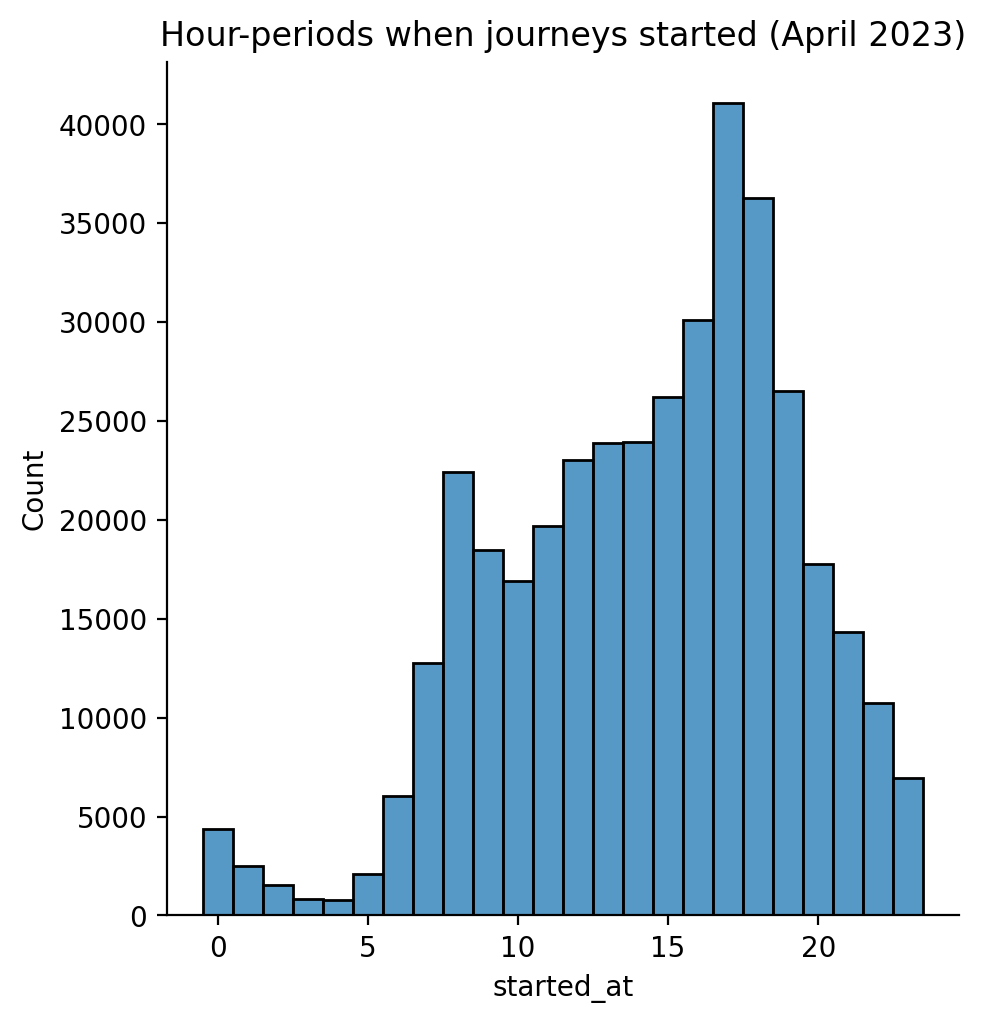

In [4]:
g_hour_dist = sns.displot(data=df_2023_04.started_at.dt.hour, discrete=True)
plt.title("Hour-periods when journeys started (April 2023)")


In [5]:
# create a straight-line vector distance from the start and end coordinates 
#source for function: https://kanoki.org/2019/12/27/how-to-calculate-distance-in-python-and-pandas-using-scipy-spatial-and-distance-functions/#calculate-distance-between-origin-and-dest
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

df_2023_04['distance'] = haversine_vectorize(df_2023_04['start_lng'],df_2023_04['start_lat'],df_2023_04['end_lng'], df_2023_04['end_lat'])

In [6]:
#add a new column for elapsed time using logical comparison of datetime objects
df_2023_04['elapsed'] = (df_2023_04.ended_at - df_2023_04.started_at)
df_2023_04.reset_index()
display(df_2023_04.sort_values('elapsed'))

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance,elapsed
11125,E55D603944B8FCD0,electric_bike,2023-04-01 13:10:57,2023-04-01 13:05:36,NaN,NaN,1st & D St SE,31643.0,38.880000,-77.010000,38.884916,-77.005965,member,0.648278,-1 days +23:54:39
273292,511BA3014B445EC9,electric_bike,2023-04-01 13:21:28,2023-04-01 13:16:39,NaN,NaN,1st & D St SE,31643.0,38.880000,-77.010000,38.884916,-77.005965,casual,0.648278,-1 days +23:55:11
225078,44AF0B55F8F746B6,electric_bike,2023-04-07 17:36:37,2023-04-07 17:31:54,NaN,NaN,Hamlin & 7th St NE,31514.0,38.930000,-77.000000,38.927497,-76.997194,member,0.369061,-1 days +23:55:17
23713,46530EFD3B36F5CE,electric_bike,2023-04-05 08:36:17,2023-04-05 08:31:39,NaN,NaN,Columbia Rd & Belmont St NW,31113.0,38.920000,-77.040000,38.920669,-77.043680,member,0.326734,-1 days +23:55:22
158268,26951567BEB18E0D,electric_bike,2023-04-25 14:46:40,2023-04-25 14:42:24,NaN,NaN,1st & Washington Hospital Center NW,31507.0,38.930000,-77.010000,38.928743,-77.012457,member,0.254215,-1 days +23:55:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278463,492F5E3810934F0B,docked_bike,2023-04-15 11:20:00,2023-04-30 14:55:42,Jefferson Dr & 14th St SW,31247.0,6035 Warehouse,32901.0,38.888553,-77.032427,38.963810,-77.010266,casual,8.579581,15 days 03:35:42
129337,26FD697DC683BFF3,docked_bike,2023-04-09 23:56:17,2023-04-27 04:56:48,Largo Town Center Metro,32401.0,NaN,NaN,38.899811,-76.844604,NaN,NaN,casual,NaN,17 days 05:00:31
127548,D9FB7B8DD4F95AD4,docked_bike,2023-04-15 15:24:54,2023-05-03 04:47:51,19th St & Constitution Ave NW,31235.0,NaN,NaN,38.892212,-77.043074,NaN,NaN,casual,NaN,17 days 13:22:57
296292,713B06BD0037E044,docked_bike,2023-04-08 22:55:48,2023-04-26 18:59:53,14th & R St NW,31202.0,Potomac Greens Dr & Slaters Ln,31083.0,38.913046,-77.032008,38.821750,-77.047494,casual,10.233374,17 days 20:04:05


In [7]:
#filter journeys of 0 net distance AND time less than 5 minutes (300s), to exclude only false starts but not round trips
t_threshold = datetime.timedelta(minutes = 5)
df_fs = (df_2023_04[(df_2023_04.distance == 0) & (df_2023_04.elapsed < t_threshold)])
#display(df_fs)
df_fs.elapsed.describe()

#exclude these journeys 
df_2023_04_nfs = df_2023_04.drop(df_fs.index)
df_2023_04_nfs

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance,elapsed
0,7D89911108C4305F,classic_bike,2023-04-15 12:51:45,2023-04-15 12:57:14,16th & Harvard St NW,31135.0,Lamont & Mt Pleasant NW,31107.0,38.926102,-77.036650,38.931900,-77.038800,member,0.670575,0 days 00:05:29
1,FF47021098DE06BD,electric_bike,2023-04-11 18:21:35,2023-04-11 18:37:47,Rosedale Rec Center,31658.0,6th St & Indiana Ave NW,31264.0,38.897897,-76.979721,38.894573,-77.019940,member,3.497933,0 days 00:16:12
2,BB41905DB8DE1CC7,classic_bike,2023-04-16 18:09:23,2023-04-16 18:26:10,2nd St & Seaton Pl NE,31522.0,15th & W St NW,31125.0,38.914751,-77.003560,38.919018,-77.034449,member,2.712487,0 days 00:16:47
3,0B1CB1A1E2380DD9,electric_bike,2023-04-29 17:13:36,2023-04-29 17:17:37,2nd St & Seaton Pl NE,31522.0,MBT & Bryant St NE,31531.0,38.914697,-77.003593,38.922404,-76.996023,member,1.077837,0 days 00:04:01
4,D321DE32CAFDDD51,classic_bike,2023-04-29 17:53:46,2023-04-29 18:02:10,23rd & E St NW,31260.0,15th & M St NW,31298.0,38.896104,-77.049882,38.905424,-77.034674,member,1.674044,0 days 00:08:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389238,EAA293669D7032B0,electric_bike,2023-04-12 17:10:02,2023-04-12 17:33:47,Thomas Jefferson St NW & Water/K St NW,31293.0,13th & H St NE,31611.0,38.902996,-77.060003,38.900427,-76.988250,member,6.211805,0 days 00:23:45
389239,E76129D0EB71B579,classic_bike,2023-04-05 17:25:35,2023-04-05 18:04:43,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,13th & H St NE,31611.0,38.884095,-76.995234,38.900427,-76.988250,casual,1.912751,0 days 00:39:08
389240,5A2E2DED1A83FCFE,classic_bike,2023-04-17 21:18:44,2023-04-17 21:27:38,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,13th & H St NE,31611.0,38.884095,-76.995234,38.900427,-76.988250,casual,1.912751,0 days 00:08:54
389241,AADF7A5217DC964E,classic_bike,2023-04-08 18:11:21,2023-04-08 18:47:46,Lincoln Memorial,31258.0,4th & E St SW,31244.0,38.888255,-77.049436,38.884120,-77.017445,casual,2.805129,0 days 00:36:25


In [8]:
#show overview of time elapsed
display("Max length:", df_2023_04_nfs.elapsed.max(), "Mean length:", df_2023_04_nfs.elapsed.mean(), "Median length:", df_2023_04_nfs.elapsed.median())

'Max length:'

Timedelta('20 days 19:50:18')

'Mean length:'

Timedelta('0 days 00:25:47.173975274')

'Median length:'

Timedelta('0 days 00:11:52')

In [9]:
#filtered df: only journeys less than 24 hours but over 1 minute
t_lower = np.timedelta64(1, 'm')
t_upper = np.timedelta64(1439, 'm')
df_elap_filt = df_2023_04_nfs[(df_2023_04_nfs['elapsed'] < t_upper) & (df_2023_04_nfs['elapsed'] > t_lower)]
display("Max length:", df_elap_filt.elapsed.max(), "Mean length:", df_elap_filt.elapsed.mean(), "Median length:", df_elap_filt.elapsed.median())

'Max length:'

Timedelta('0 days 23:53:04')

'Mean length:'

Timedelta('0 days 00:20:36.733378374')

'Median length:'

Timedelta('0 days 00:11:56')

In [10]:
#import census data
df_census = pd.read_csv('ACS_Demog_Human_Readable_Rows_Pruned.csv')
df_census.dtypes

Census track code                                         int64
GEO Identification                                        int64
Tract Name                                              float64
Area Land                                                 int64
Area Water                                                int64
Latitude Centroid                                       float64
Longitude Centroid                                      float64
Population                                                int64
Male                                                      int64
Female                                                    int64
Sex ratio (males per 100 females)                       float64
Median age (years)                                      float64
Under 18 years                                            int64
16 years and over                                         int64
18 years and over                                         int64
21 years and over                       

In [11]:
#create a df of station data only
df_stations = df_elap_filt[['start_station_name', 'start_station_id', 'start_lat', 'start_lng']].drop_duplicates('start_station_name').reset_index(drop=True)

#insert two nearest stations (to tract centroid) into census data:
#source: https://towardsdatascience.com/using-scikit-learns-binary-trees-to-efficiently-find-latitude-and-longitude-neighbors-909979bd929b

from sklearn.neighbors import BallTree, KDTree

# Creates new columns converting coordinate degrees to radians.
for column in df_stations[["start_lat", "start_lng"]]:
    rad = np.deg2rad(df_stations[column].values)
    df_stations[f'{column}_rad'] = rad
for column in df_census[["Latitude Centroid", "Longitude Centroid"]]:
    rad = np.deg2rad(df_census[column].values)
    df_census[f'{column}_rad'] = rad

# Takes the first group's latitude and longitude values to construct the ball tree.
ball = BallTree(df_stations[["start_lat_rad", "start_lng_rad"]].values, metric='haversine')
# The amount of neighbors to return.
k = 2
# Executes a query with the second group. This will also return two arrays.
distances, indices = ball.query(df_census[["Latitude Centroid_rad", "Longitude Centroid_rad"]].values, k = k)
distances = distances * 6.371 #to km

#The result is two arrays: distances; indices of the neighboring locations in the DataFrame used to construct the tree
#The indices can be then be mapped to useful values and both arrays easily merged with the rest of the data.

#source: https://stackoverflow.com/questions/69262454/how-do-i-map-a-numpy-array-and-an-indices-array-to-a-pandas-dataframe
dists = pd.DataFrame(distances).stack()
rel = pd.DataFrame(indices).stack()
neighbor_df = pd.merge(dists.rename('distance'), rel.rename('neighbor_idx'), right_index=True, left_index=True)
neighbor_df = neighbor_df.reset_index(level=1)
neighbor_df.columns = ['neighbor_number', 'distance', 'neighbor_idx']

#add the two nearest stations's ID and distance to each census tract
df_census_stn = df_census.join(neighbor_df).merge(df_stations[['start_station_name']], left_on='neighbor_idx', right_index=True, suffixes=("", "_neighbor")).drop('neighbor_idx', axis=1)

In [12]:
#compare journey start times at highest and lowest proportion one-race-white tract stations:

#create a df showing the stations and the count of people in census tracts primarily or secondarily 
#served by the station, by proportion of one-race-white residents
df_stn_race = df_census_stn[['start_station_name', 'Population', 'RACE: One race: White']]\
    .groupby('start_station_name').sum()

#first exclude non-residential areas by crude count of population TODO: add balance of business/residential from other data
df_stn_race = df_stn_race[df_stn_race['Population'] > 1200]

#create a column showing the density of one-race-white residents
df_stn_race['den_white'] = df_stn_race['RACE: One race: White']/df_stn_race['Population']

#sort df by this column
df_stn_race = df_stn_race.sort_values(by='den_white')

df_stn_race

,Population,RACE: One race: White,den_white
start_station_name,,,
Mississippi Ave & 19th St SE / THEARC,7009,9,0.001284
61st St & Banks Pl NE,4066,8,0.001968
Benning Branch Library,11040,41,0.003714
37th & Ely Pl SE,7138,29,0.004063
19th & Savannah St SE,10539,63,0.005978
...,...,...,...
24th & N St NW,3093,2752,0.889751
Eastern Market / 7th & North Carolina Ave SE,2042,1836,0.899119
New Hampshire Ave & T St NW,3771,3409,0.904004


In [13]:
#use mask to show trip data by 5 lowest-one-race-white tracts' stations
stns_low_w = df_stn_race.iloc[0:5].reset_index()

df_trips_low_w = df_elap_filt[df_elap_filt.start_station_name.isin(stns_low_w['start_station_name'])]
df_trips_low_w

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance,elapsed
1774,C9BD16651BE26448,classic_bike,2023-04-01 11:39:39,2023-04-01 11:57:59,37th & Ely Pl SE,31715.0,Benning Branch Library,31705.0,38.883011,-76.949709,38.894000,-76.947974,member,1.230341,0 days 00:18:20
2762,9955B2AEC8474C25,classic_bike,2023-04-18 10:06:36,2023-04-18 10:11:26,19th & Savannah St SE,31815.0,Congress Heights Metro,31806.0,38.846230,-76.977030,38.844711,-76.987823,member,0.949249,0 days 00:04:50
8731,CA63693E9537C6A7,classic_bike,2023-04-05 19:58:21,2023-04-05 20:09:19,Mississippi Ave & 19th St SE / THEARC,31814.0,Valley Ave & Wheeler Rd SE,31824.0,38.843770,-76.975570,38.836646,-76.993589,member,1.749053,0 days 00:10:58
9359,256C081AF01CD899,classic_bike,2023-04-07 16:37:49,2023-04-07 16:44:09,37th & Ely Pl SE,31715.0,Randle Circle & Minnesota Ave SE,31702.0,38.883011,-76.949709,38.878000,-76.960700,member,1.101852,0 days 00:06:20
12614,DA5D0860998CEB91,classic_bike,2023-04-03 16:39:04,2023-04-03 16:51:09,61st St & Banks Pl NE,31714.0,61st St & Banks Pl NE,31714.0,38.891805,-76.913563,38.891805,-76.913563,casual,0.000000,0 days 00:12:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333824,6CFA3CECBD4809EC,classic_bike,2023-04-21 17:02:35,2023-04-21 17:04:54,19th & Savannah St SE,31815.0,Mississippi Ave & 19th St SE / THEARC,31814.0,38.846230,-76.977030,38.843770,-76.975570,member,0.301160,0 days 00:02:19
334187,529EE5B8E2A36D24,classic_bike,2023-04-07 12:51:53,2023-04-07 13:40:18,Mississippi Ave & 19th St SE / THEARC,31814.0,Mississippi Ave & 19th St SE / THEARC,31814.0,38.843770,-76.975570,38.843770,-76.975570,casual,0.000000,0 days 00:48:25
351453,CD2119E5D8814ECB,classic_bike,2023-04-04 16:51:47,2023-04-04 17:01:27,Mississippi Ave & 19th St SE / THEARC,31814.0,Alabama Ave & Stanton Rd SE / Shops at Park Vi...,31813.0,38.843770,-76.975570,38.846270,-76.981850,casual,0.610413,0 days 00:09:40
351477,A6973C8DBF26E9AB,classic_bike,2023-04-05 08:51:44,2023-04-05 09:12:44,Mississippi Ave & 19th St SE / THEARC,31814.0,Alabama Ave & Stanton Rd SE / Shops at Park Vi...,31813.0,38.843770,-76.975570,38.846270,-76.981850,casual,0.610413,0 days 00:21:00


In [14]:
#use mask to show trip data by 5 highest-one-race-white tracts' stations
stns_high_w = df_stn_race.iloc[-6:-1].reset_index()
stns_high_w

df_trips_high_w = df_elap_filt[df_elap_filt.start_station_name.isin(stns_high_w['start_station_name'])]

df_trips_high_w

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance,elapsed
125,059A5978B4CC3137,classic_bike,2023-04-05 22:03:03,2023-04-05 22:11:59,New Hampshire Ave & Ward Pl NW,31212.0,New Hampshire Ave & 24th St NW,31275.0,38.905711,-77.047318,38.901755,-77.051084,member,0.547104,0 days 00:08:56
169,A4C00E8284D5FBE4,classic_bike,2023-04-20 10:19:19,2023-04-20 10:45:22,Eastern Market / 7th & North Carolina Ave SE,31610.0,17th & K St NW,31213.0,38.886952,-76.996806,38.902760,-77.038630,member,4.021285,0 days 00:26:03
170,220EB3E23CF8FB57,docked_bike,2023-04-07 17:28:55,2023-04-07 18:13:41,Eastern Market / 7th & North Carolina Ave SE,31610.0,17th & K St NW,31213.0,38.886952,-76.996806,38.902760,-77.038630,casual,4.021285,0 days 00:44:46
238,5AC4F71F8D36B74C,classic_bike,2023-04-22 11:18:36,2023-04-22 11:34:12,New Hampshire Ave & T St NW,31229.0,8th & H St NW,31228.0,38.915544,-77.038252,38.899700,-77.023086,member,2.195415,0 days 00:15:36
239,AEFEE268A4DB9B2F,classic_bike,2023-04-21 13:47:00,2023-04-21 13:57:27,New Hampshire Ave & T St NW,31229.0,New York Ave & 15th St NW,31222.0,38.915544,-77.038252,38.899032,-77.033354,member,1.883109,0 days 00:10:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388046,7B6B9C174CC2483B,classic_bike,2023-04-07 07:00:55,2023-04-07 07:14:27,New Hampshire Ave & T St NW,31229.0,11th & Girard St NW,31126.0,38.915544,-77.038252,38.925636,-77.027112,member,1.478287,0 days 00:13:32
388059,0AAE5BEF8DC158DE,classic_bike,2023-04-08 21:01:34,2023-04-08 21:19:22,New Hampshire Ave & Ward Pl NW,31212.0,New Jersey Ave & N St NW/Dunbar HS,31636.0,38.905711,-77.047318,38.907333,-77.015360,member,2.769349,0 days 00:17:48
388074,2AF5D4F758E9EAAC,classic_bike,2023-04-30 22:39:21,2023-04-30 23:04:48,New Hampshire Ave & T St NW,31229.0,Langston Blvd & N Scott St,31080.0,38.915544,-77.038252,38.897612,-77.080851,member,4.188154,0 days 00:25:27
388548,86E775A4D4647441,electric_bike,2023-04-12 02:24:32,2023-04-12 02:31:50,New Hampshire Ave & T St NW,31229.0,11th & Girard St NW,31126.0,38.915570,-77.038391,38.925636,-77.027112,casual,1.483979,0 days 00:07:18


Text(0.5, 0.98, 'Trip start time distribution by start area demogrphics')

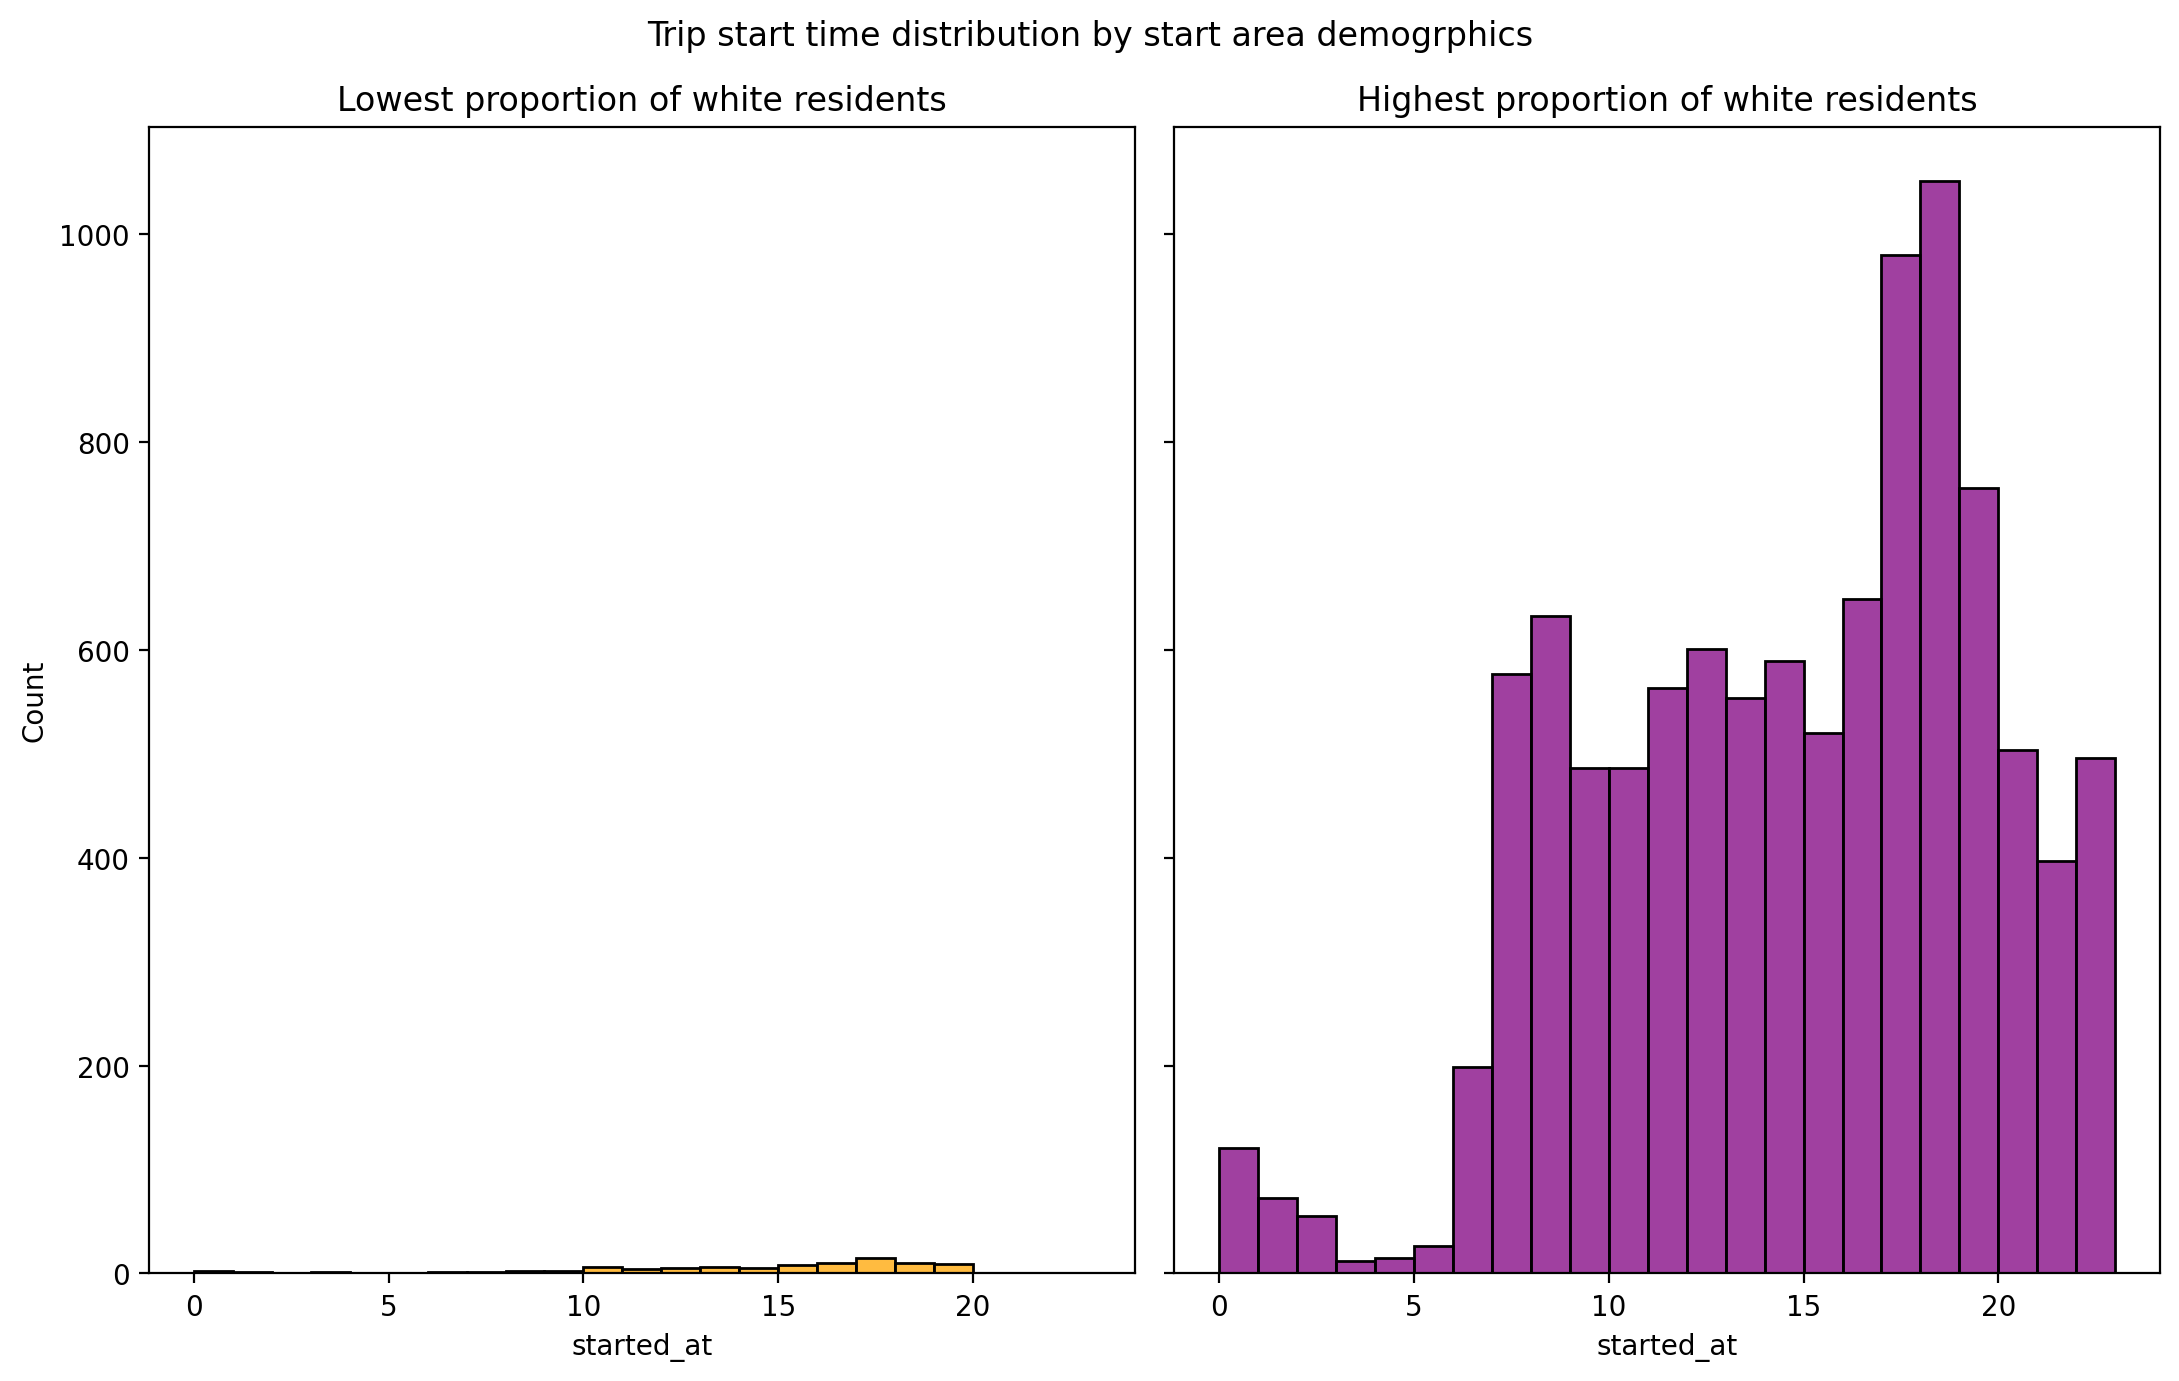

In [15]:
#graph highest vs lowest
fig, axes=plt.subplots(1,2,sharey="row", layout='tight', sharex=True, figsize=(11,7)) 
sns.histplot(ax=axes[0], data=df_trips_low_w.started_at.dt.hour, binwidth=1, color='orange')
axes[0].set_title('Lowest proportion of white residents')
sns.histplot(ax=axes[1],data=df_trips_high_w.started_at.dt.hour, binwidth=1, color='purple')
axes[1].set_title('Highest proportion of white residents')
fig.suptitle('Trip start time distribution by start area demogrphics')

In [16]:
#because this is a very small amount of trips, I will make second filtered trip df with the 25 lowest
stns_low_w_75 = df_stn_race.iloc[0:75].reset_index()
df_trips_low_w_75 = df_elap_filt[df_elap_filt.start_station_name.isin(stns_low_w_75['start_station_name'])]
df_trips_low_w_75

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance,elapsed
1,FF47021098DE06BD,electric_bike,2023-04-11 18:21:35,2023-04-11 18:37:47,Rosedale Rec Center,31658.0,6th St & Indiana Ave NW,31264.0,38.897897,-76.979721,38.894573,-77.019940,member,3.497933,0 days 00:16:12
48,DF9B9C03CE4DE9CB,classic_bike,2023-04-20 17:58:05,2023-04-20 18:09:35,Rosedale Rec Center,31658.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.897808,-76.979634,38.884095,-76.995234,member,2.035390,0 days 00:11:30
66,DCF9F464FC21E732,classic_bike,2023-04-13 18:47:32,2023-04-13 18:56:18,Rosedale Rec Center,31658.0,Columbus Circle / Union Station,31623.0,38.897808,-76.979634,38.896960,-77.004930,member,2.189767,0 days 00:08:46
103,F781683981FADE96,electric_bike,2023-04-22 05:14:19,2023-04-22 05:36:40,Georgia & Missouri Ave NW,31411.0,24th & N St NW,31255.0,38.961432,-77.027822,38.906600,-77.051520,member,6.428383,0 days 00:22:21
107,ABC22048334E18EF,classic_bike,2023-04-12 18:39:55,2023-04-12 18:41:59,10th St & Rhode Island Ave NE,31535.0,Rhode Island Ave Metro,31516.0,38.922489,-76.992670,38.920682,-76.995876,member,0.342263,0 days 00:02:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389026,4263F76E5F7D1F77,electric_bike,2023-04-05 17:53:11,2023-04-05 18:07:13,New York Ave & Hecht Ave NE,31518.0,11th & Girard St NW,31126.0,38.915802,-76.983545,38.925636,-77.027112,casual,3.922004,0 days 00:14:02
389027,5406790D20EA7089,electric_bike,2023-04-18 10:02:31,2023-04-18 10:10:51,New York Ave & Hecht Ave NE,31518.0,13th & H St NE,31611.0,38.915593,-76.983674,38.900427,-76.988250,casual,1.731166,0 days 00:08:20
389054,6FE4B065D32FC30E,classic_bike,2023-04-27 12:45:54,2023-04-27 12:58:29,New York Ave & Hecht Ave NE,31518.0,13th & H St NE,31611.0,38.915604,-76.983683,38.900427,-76.988250,casual,1.732194,0 days 00:12:35
389058,1F0F8BAD0A58B980,classic_bike,2023-04-25 20:07:32,2023-04-25 20:19:24,New York Ave & Hecht Ave NE,31518.0,13th & H St NE,31611.0,38.915604,-76.983683,38.900427,-76.988250,member,1.732194,0 days 00:11:52


In [17]:
#check white ratio in the 75 stations is still a minority (it is)
df_stn_race.iloc[0:75]

,Population,RACE: One race: White,den_white
start_station_name,,,
Mississippi Ave & 19th St SE / THEARC,7009,9,0.001284
61st St & Banks Pl NE,4066,8,0.001968
Benning Branch Library,11040,41,0.003714
37th & Ely Pl SE,7138,29,0.004063
19th & Savannah St SE,10539,63,0.005978
...,...,...,...
18th St & Rhode Island Ave NE,4932,1058,0.214517
18th & Monroe St NE,4932,1058,0.214517
Potomac Ave & Half St SW,2492,549,0.220305


Text(0.5, 0.98, 'Trip start time distribution by start area demogrphics')

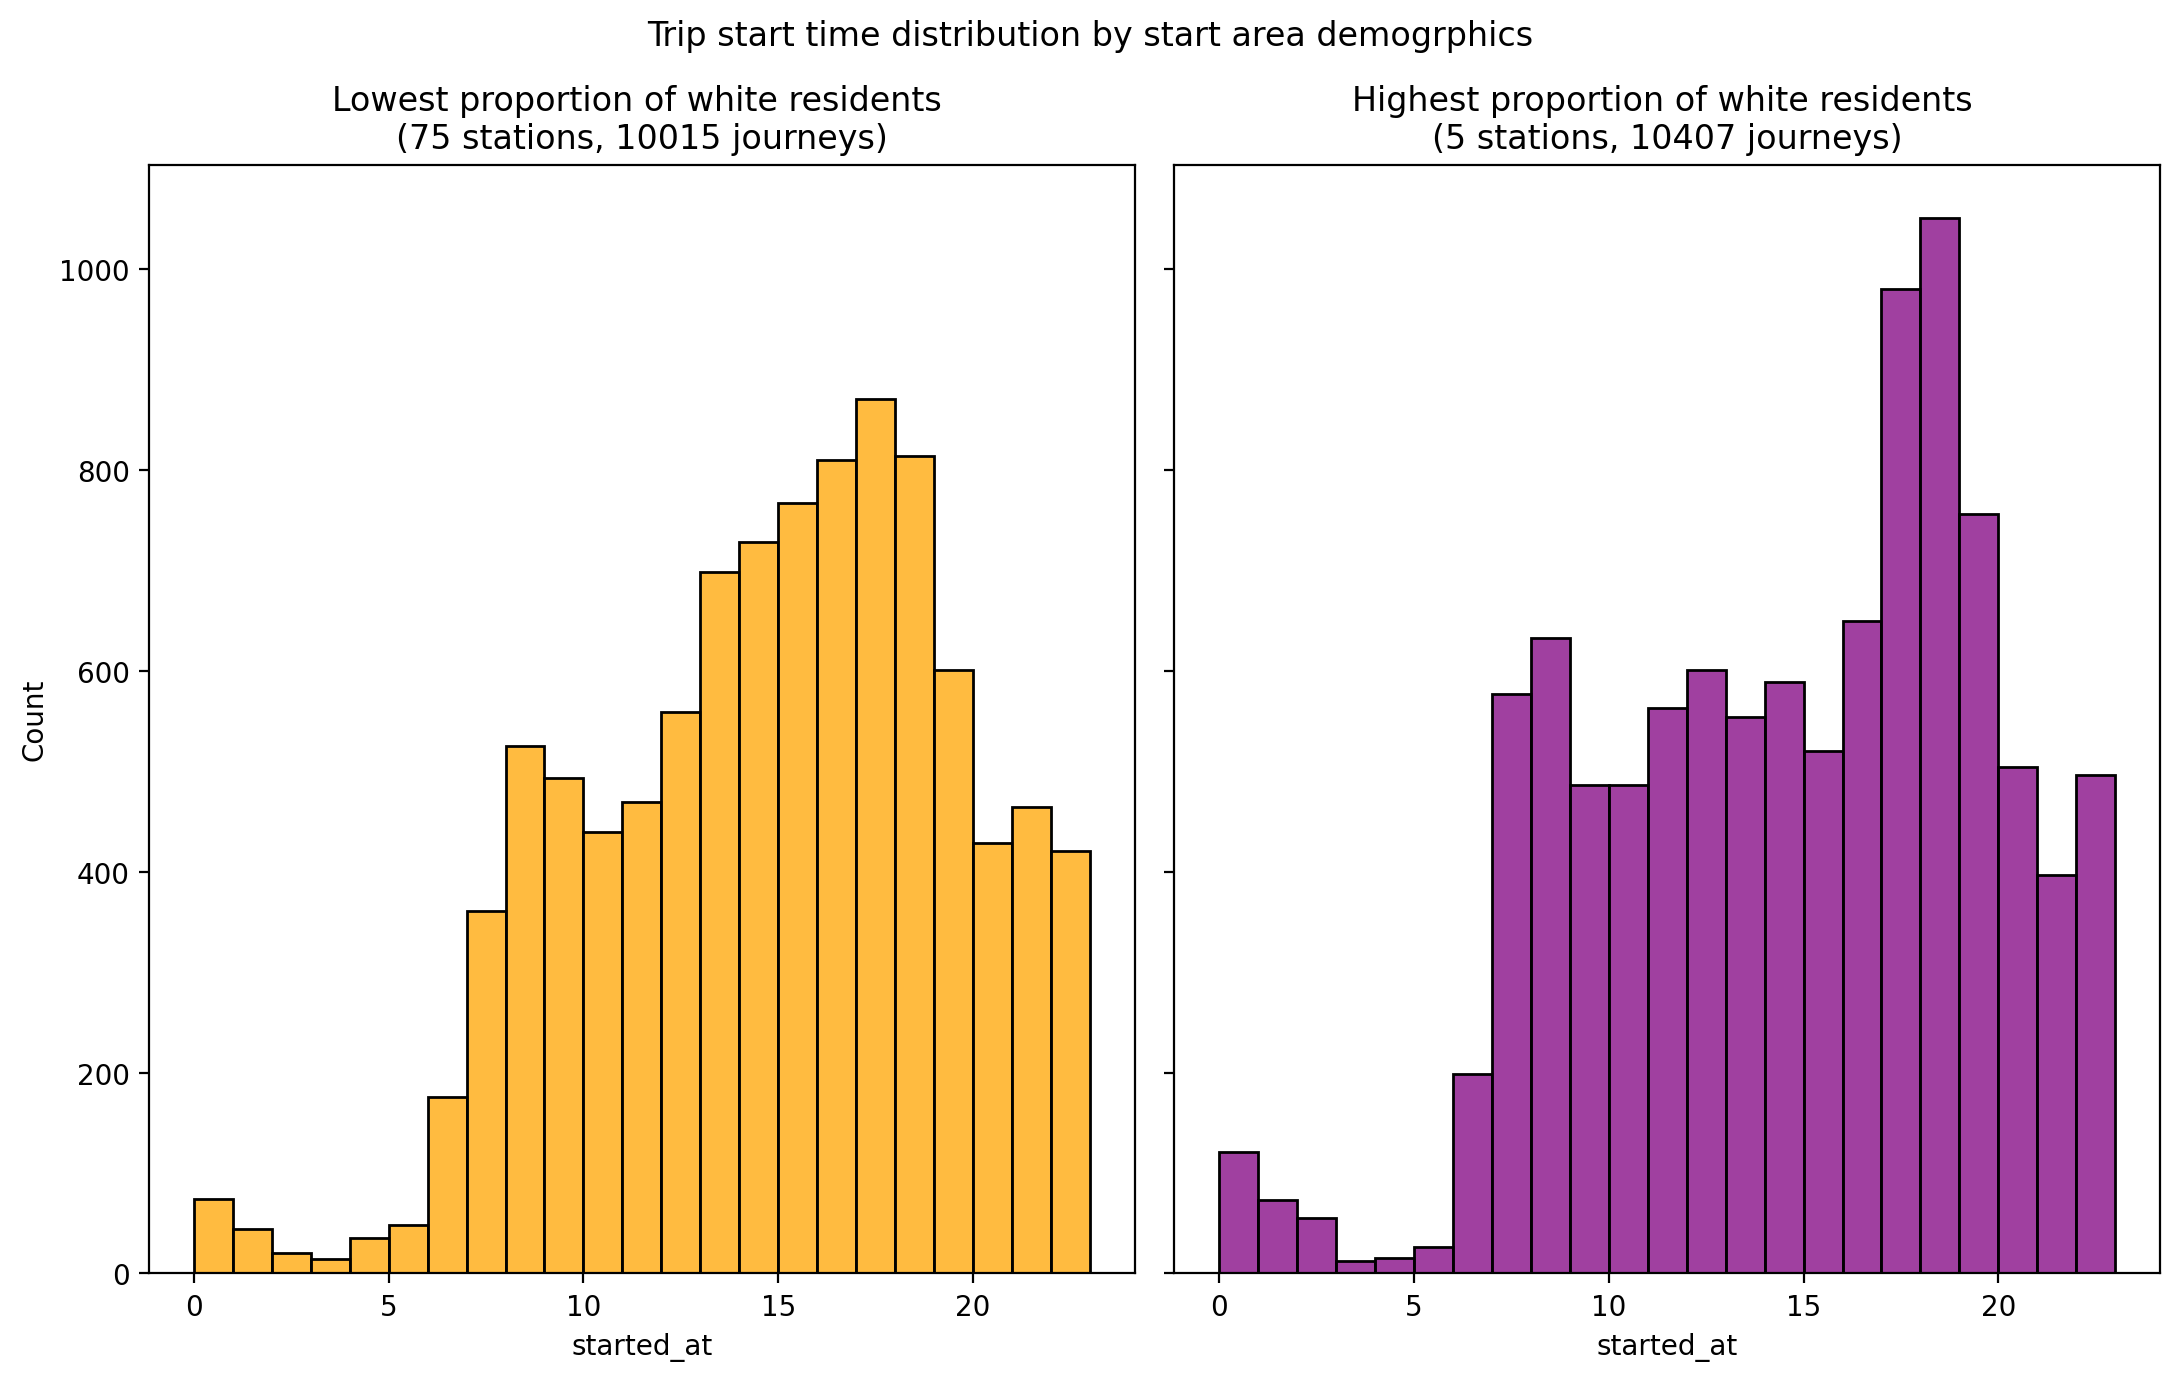

In [18]:
#same but compare bottom 75 to top 5 whitest areas
fig, axes=plt.subplots(1,2,sharey="row", layout='tight', figsize=(11,7)) 
sns.histplot(ax=axes[0], data=df_trips_low_w_75.started_at.dt.hour, binwidth=1, color='orange')
axes[0].set_title('Lowest proportion of white residents \n(75 stations, 10015 journeys)')
sns.histplot(ax=axes[1],data=df_trips_high_w.started_at.dt.hour, binwidth=1, color='purple')
axes[1].set_title('Highest proportion of white residents \n(5 stations, 10407 journeys)')
fig.suptitle('Trip start time distribution by start area demogrphics')

Text(0.5, 0.98, 'Trip duration distribution by start area demogrphics')

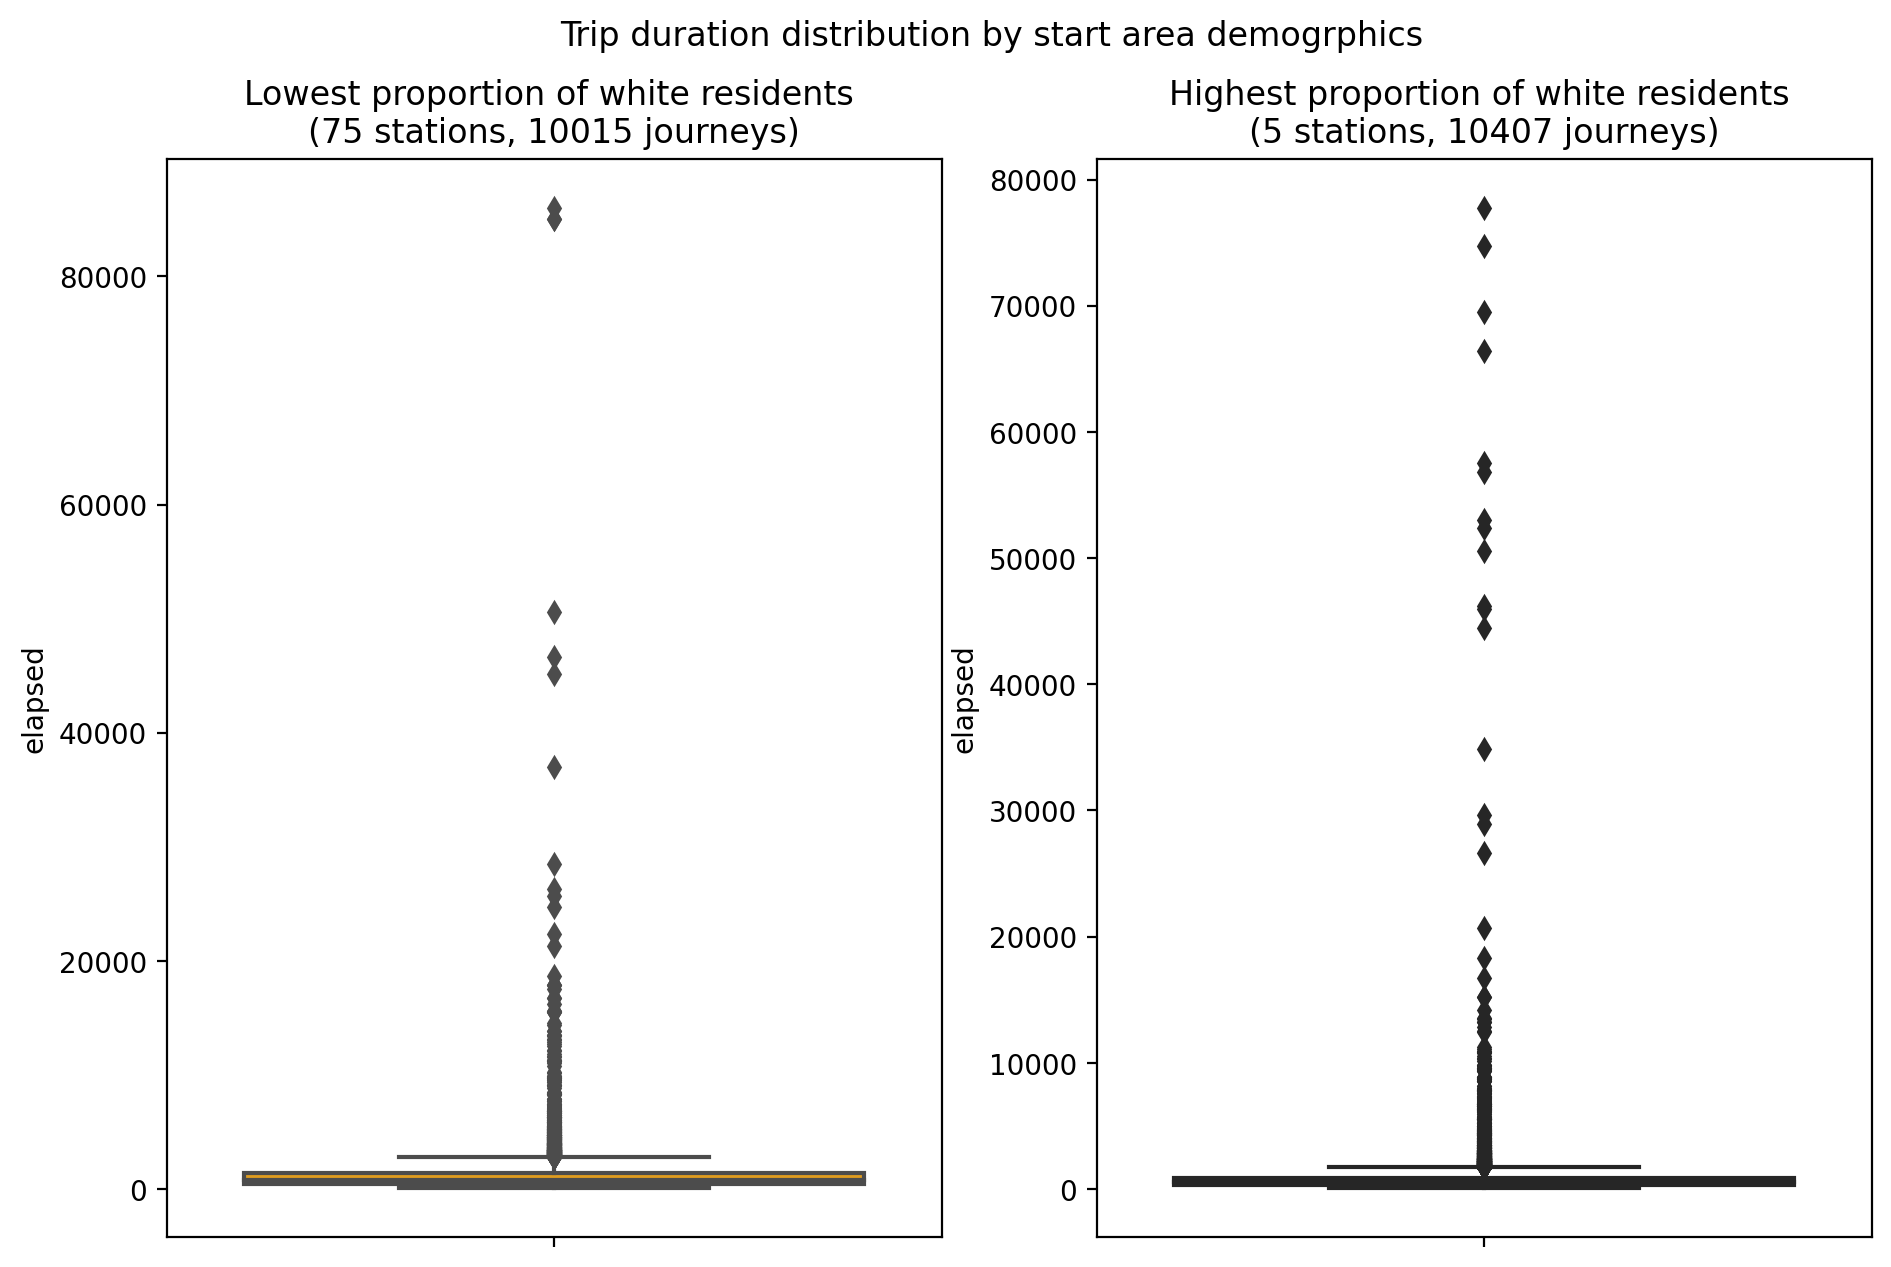

In [19]:
fig, axes=plt.subplots(1,2, figsize=(11,7)) 
sns.boxplot(ax=axes[0], data=df_trips_low_w_75, y=df_trips_low_w_75.elapsed.dt.total_seconds(), color='orange')
axes[0].set_title('Lowest proportion of white residents \n(75 stations, 10015 journeys)')
sns.boxplot(ax=axes[1],data=df_trips_high_w, y=df_trips_high_w.elapsed.dt.total_seconds(),  color='purple')
axes[1].set_title('Highest proportion of white residents \n(5 stations, 10407 journeys)')
fig.suptitle('Trip duration distribution by start area demogrphics')


# fig, axes=plt.subplots(1,2)

# sns.set_style('darkgrid')
# sns.boxplot(ax=axes[0], data=wines, x=wines.quality_label, y=wines.pH)
# axes[0].set_title('pH')

# sns.boxplot(ax=axes[1],data=wines, x=wines.quality_label, y=wines.alcohol)
# axes[1].set_title('Alcohol %')

# fig.suptitle('Wine pH and Alcohol % by Quality Class')

# plt.tight_layout()

In [20]:
#double check all durations are in range
df_trips_low_w_75.sort_values(by='elapsed')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance,elapsed
204868,11909061CCFF5D6A,classic_bike,2023-04-29 11:58:15,2023-04-29 11:59:21,Good Hope Rd & 14th St SE,31803.0,Good Hope Rd & MLK Ave SE,31802.0,38.866611,-76.985238,38.867373,-76.988039,member,0.256717,0 days 00:01:06
239676,1784A0C76D70831E,electric_bike,2023-04-16 17:55:17,2023-04-16 17:56:23,Livingston Rd & 3rd St SE,31818.0,Livingston Rd & 3rd St SE,31818.0,38.823751,-77.002230,38.823730,-77.002230,casual,0.002278,0 days 00:01:06
28855,5808AD68AFF81DB7,electric_bike,2023-04-01 15:30:52,2023-04-01 15:31:59,14th St & Colorado Ave NW,31407.0,14th St & Colorado Ave NW,31407.0,38.956418,-77.032920,38.956432,-77.032947,member,0.002750,0 days 00:01:07
141180,AFE64A550C564C1B,electric_bike,2023-04-10 12:34:52,2023-04-10 12:36:00,New Hampshire & Gallatin St NW,31418.0,NaN,NaN,38.951599,-77.012823,38.950000,-77.010000,member,0.301758,0 days 00:01:08
18269,9D0F70D4900C8C4E,classic_bike,2023-04-30 07:55:55,2023-04-30 07:57:03,Good Hope Rd & 14th St SE,31803.0,Good Hope Rd & MLK Ave SE,31802.0,38.866611,-76.985238,38.867373,-76.988039,member,0.256717,0 days 00:01:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103986,086C4664F36FCB81,classic_bike,2023-04-12 17:12:57,2023-04-13 06:10:50,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,Minnesota Ave Metro/DOES,31703.0,38.901385,-76.941877,38.897063,-76.947446,casual,0.680173,0 days 12:57:53
225964,1C22D88E235879BA,classic_bike,2023-04-20 18:14:40,2023-04-21 08:17:46,Anacostia Roller Skating Pavilion,31720.0,Anacostia Roller Skating Pavilion,31720.0,38.878771,-76.970930,38.878771,-76.970930,casual,0.000000,0 days 14:03:06
22807,1016D5119E4AAB0C,docked_bike,2023-04-03 16:16:55,2023-04-04 15:54:02,Edgewood Rec Center,31529.0,Edgewood Rec Center,31529.0,38.924144,-77.002098,38.924144,-77.002098,casual,0.000000,0 days 23:37:07
300079,DB98E443A3383C02,docked_bike,2023-04-03 16:16:43,2023-04-04 15:54:26,Edgewood Rec Center,31529.0,Edgewood Rec Center,31529.0,38.924144,-77.002098,38.924144,-77.002098,casual,0.000000,0 days 23:37:43


Text(0.5, 0.98, 'Trip distance distribution by start area demographics')

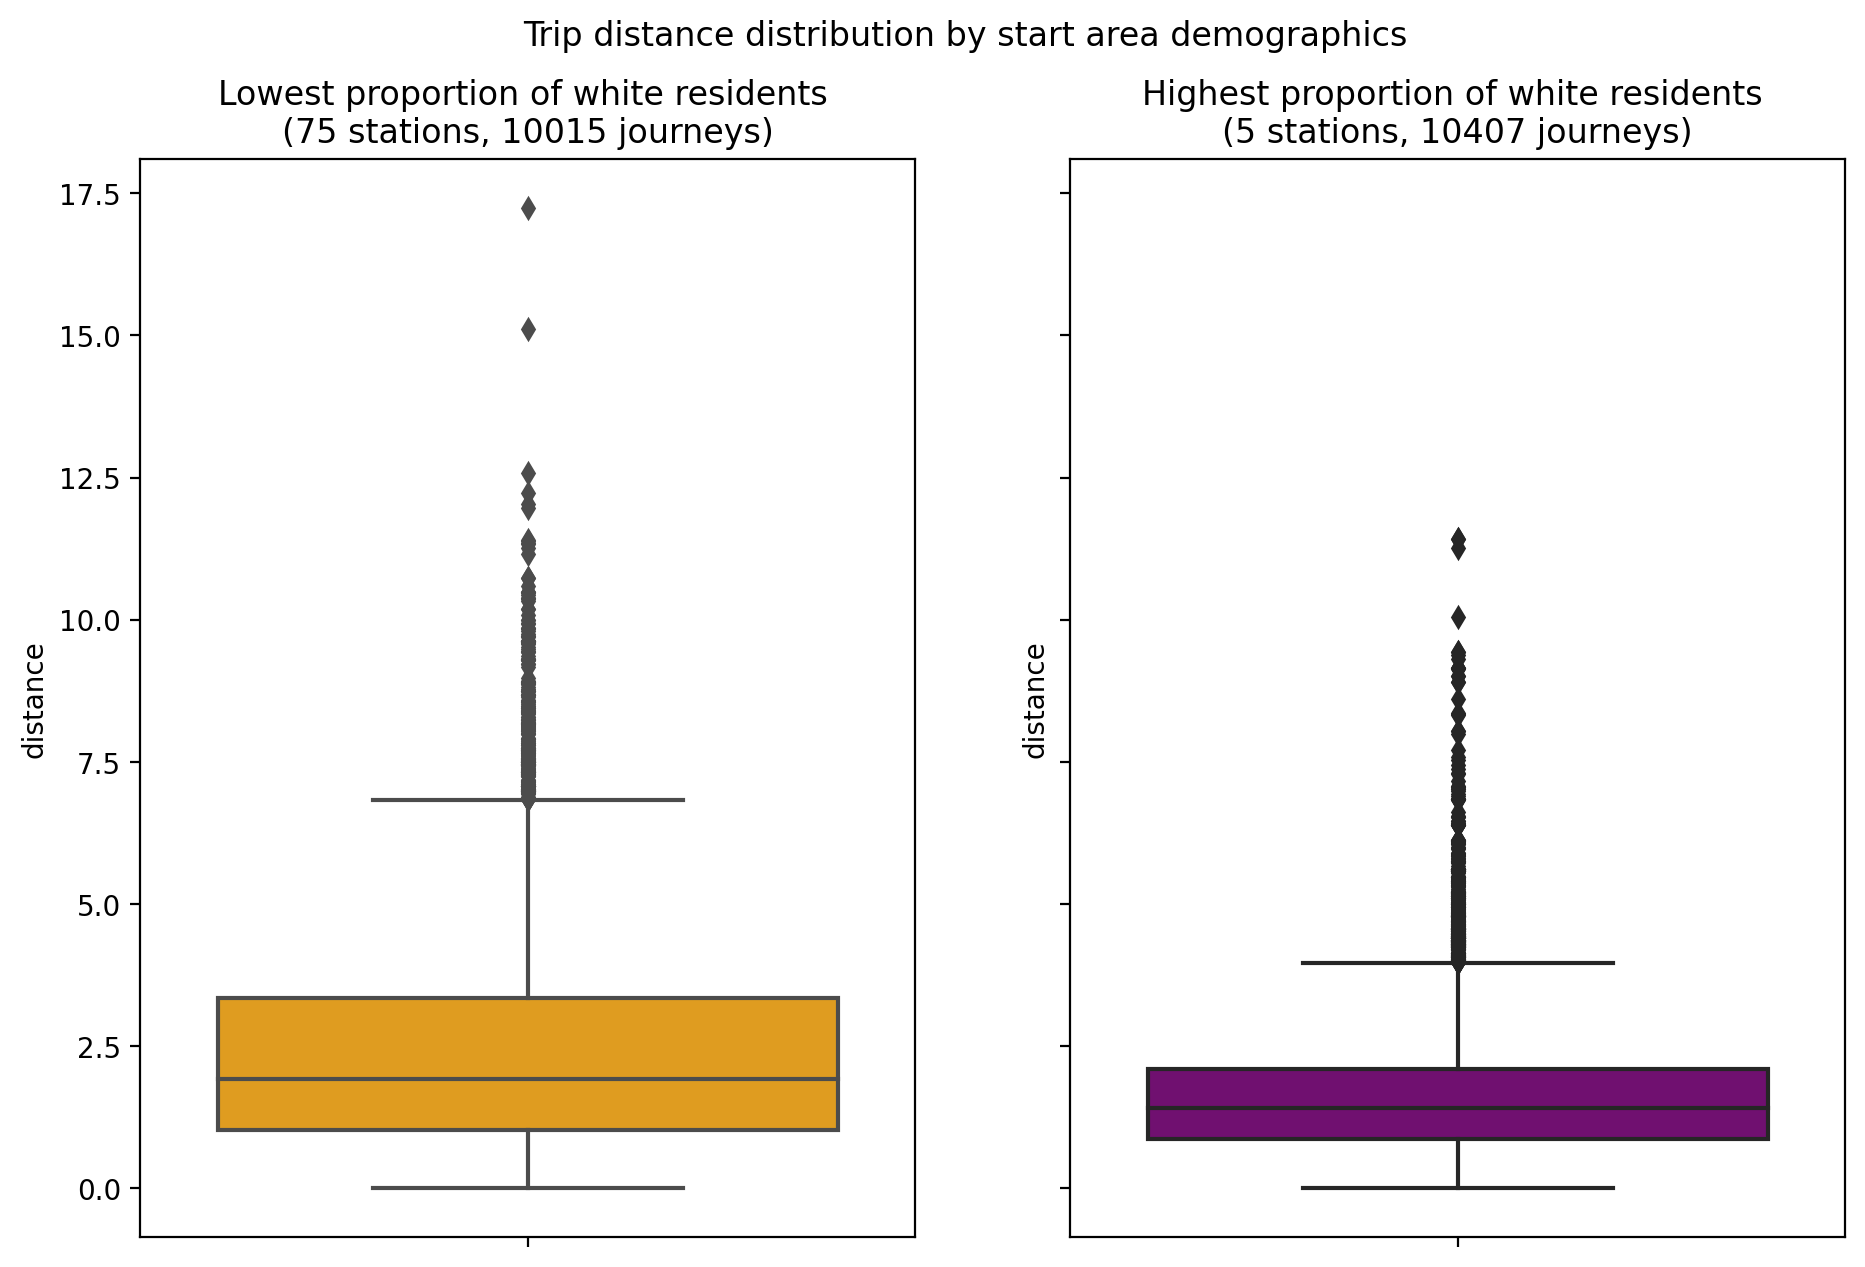

In [21]:
fig, axes=plt.subplots(1,2, figsize=(11,7), sharey=True) 
sns.boxplot(ax=axes[0], data=df_trips_low_w_75, y=df_trips_low_w_75.distance, color='orange')
axes[0].set_title('Lowest proportion of white residents \n(75 stations, 10015 journeys)')
sns.boxplot(ax=axes[1],data=df_trips_high_w, y=df_trips_high_w.distance,  color='purple')
axes[1].set_title('Highest proportion of white residents \n(5 stations, 10407 journeys)')
fig.suptitle('Trip distance distribution by start area demographics')

In [22]:
#map highest vs lowest
import folium

m = folium.Map(location=[38.9072, -77.0369], zoom_start=11)


In [23]:
#make a new df of just stations coordinates for mapping
df_stations_m = df_stations[["start_lat", "start_lng", "start_station_name"]]


In [24]:
#source: https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94

#iterate over df to get out (all) station coordinate tuples and add as markers
for index, location_info in df_stations_m.iterrows():
    folium.Marker([location_info["start_lat"], location_info["start_lng"]], popup=location_info["start_station_name"]).add_to(m)

m

In [25]:
#new df of only top high_w stations and coordinates

df_stns_high_w = df_stations_m[df_stations_m.start_station_name.isin(stns_high_w['start_station_name'])]
df_stns_high_w

,start_lat,start_lng,start_station_name
53,38.905711,-77.047318,New Hampshire Ave & Ward Pl NW
79,38.886952,-76.996806,Eastern Market / 7th & North Carolina Ave SE
105,38.915544,-77.038252,New Hampshire Ave & T St NW
118,38.909801,-77.034427,15th & P St NW
186,38.906524,-77.051143,24th & N St NW


In [26]:
m_h = folium.Map(location=[38.9072, -77.0369], zoom_start=12)
for index, location_info in df_stns_high_w.iterrows():
    folium.Marker([location_info["start_lat"], location_info["start_lng"]], icon=folium.Icon(color='purple'), popup=location_info["start_station_name"]).add_to(m_h)
m_h

In [27]:
#new dfs for low 5 and 75 stns, new dfs of only top low_w stations and coordinates
df_stns_low_w_5 = df_stations_m[df_stations_m.start_station_name.isin(stns_low_w['start_station_name'])]
df_stns_low_w_75 = df_stations_m[df_stations_m.start_station_name.isin(stns_low_w_75['start_station_name'])]

In [28]:
m_l = folium.Map(location=[38.9072, -77.0369], zoom_start=12)
for index, location_info in df_stns_low_w_5.iterrows():
    folium.Marker([location_info["start_lat"], location_info["start_lng"]], icon=folium.Icon(color='darkred'), popup=location_info["start_station_name"]).add_to(m_l)
for index, location_info in df_stns_low_w_75.iterrows():
    folium.Marker([location_info["start_lat"], location_info["start_lng"]], icon=folium.Icon(color='orange'), popup=location_info["start_station_name"]).add_to(m_l)
m_l

In [33]:
#calculate the average distance of the nearest 2 stations from each centroid, per white %
df_census_stn_low_5 = df_census_stn[df_census_stn['start_station_name'].reset_index(drop=True).isin(df_stns_low_w_5['start_station_name'].reset_index(drop=True))]
df_census_stn_high_5 = df_census_stn[df_census_stn['start_station_name'].reset_index(drop=True).isin(df_stns_high_w['start_station_name'].reset_index(drop=True))]

/tmp/ipykernel_11146/2164422200.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_census_stn_low_5 = df_census_stn[df_census_stn['start_station_name'].reset_index(drop=True).isin(df_stns_low_w_5['start_station_name'].reset_index(drop=True))]
/tmp/ipykernel_11146/2164422200.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_census_stn_high_5 = df_census_stn[df_census_stn['start_station_name'].reset_index(drop=True).isin(df_stns_high_w['start_station_name'].reset_index(drop=True))]


In [30]:
df_census_stn_low_5

,Census track code,GEO Identification,Tract Name,Area Land,Area Water,Latitude Centroid,Longitude Centroid,Population,Male,Female,...,RACE: One race: Black or African American,Total housing units,"Citizen, 18 and over","Citizen, 18 and over: Male","Citizen, 18 and over: Female",Latitude Centroid_rad,Longitude Centroid_rad,neighbor_number,distance,start_station_name
100,8002,11001008002,80.02,578961,0,38.891540,-76.982759,3491,1708,1783,...,721,1597,2540,1235,1305,0.678785,-1.343603,1,0.000479,15th St & Massachusetts Ave SE
96,8100,11001008100,81.00,290284,0,38.893171,-76.992527,3158,1528,1630,...,209,1644,2597,1240,1357,0.678814,-1.343773,0,0.000320,7th St & Massachusetts Ave NE
96,8100,11001008100,81.00,290284,0,38.893171,-76.992527,3158,1528,1630,...,209,1644,2597,1240,1357,0.678814,-1.343773,1,0.000322,Maryland Ave & E St NE
97,8200,11001008200,82.00,338424,0,38.891831,-77.000604,2884,1258,1626,...,229,1623,2372,918,1454,0.678791,-1.343914,0,0.000206,4th & East Capitol St NE
97,8200,11001008200,82.00,338424,0,38.891831,-77.000604,2884,1258,1626,...,229,1623,2372,918,1454,0.678791,-1.343914,1,0.000236,Massachusetts Ave & 6th St NE
98,8302,11001008302,83.02,260891,0,38.896306,-76.996653,2874,1514,1360,...,151,1364,2254,1186,1068,0.678869,-1.343845,0,0.000175,D St & Maryland Ave NE
98,8302,11001008302,83.02,260891,0,38.896306,-76.996653,2874,1514,1360,...,151,1364,2254,1186,1068,0.678869,-1.343845,1,0.000197,8th & F St NE
99,8701,11001008701,87.01,382686,0,38.914102,-77.006265,2683,1244,1439,...,1251,1235,2359,1076,1283,0.679179,-1.344013,0,0.000170,Lincoln Rd & Seaton Pl NE/Harry Thomas Rec Center
99,8701,11001008701,87.01,382686,0,38.914102,-77.006265,2683,1244,1439,...,1251,1235,2359,1076,1283,0.679179,-1.344013,1,0.000245,2nd St & Seaton Pl NE
100,8002,11001008002,80.02,578961,0,38.891540,-76.982759,3491,1708,1783,...,721,1597,2540,1235,1305,0.678785,-1.343603,0,0.000192,15th & East Capitol St NE


In [38]:
df_census_stn_low_5.distance.mean() * 6367

1.6184013670031239

In [36]:
df_census_stn_low_75 = df_census_stn[df_census_stn['start_station_name'].reset_index(drop=True).isin(df_stns_low_w_75['start_station_name'].reset_index(drop=True))]
df_census_stn_low_75.distance.mean() * 6367 


/tmp/ipykernel_11146/2960272129.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_census_stn_low_75 = df_census_stn[df_census_stn['start_station_name'].reset_index(drop=True).isin(df_stns_low_w_75['start_station_name'].reset_index(drop=True))]


2.7878871720366436

In [35]:
df_census_stn_high_5

,Census track code,GEO Identification,Tract Name,Area Land,Area Water,Latitude Centroid,Longitude Centroid,Population,Male,Female,...,RACE: One race: Black or African American,Total housing units,"Citizen, 18 and over","Citizen, 18 and over: Male","Citizen, 18 and over: Female",Latitude Centroid_rad,Longitude Centroid_rad,neighbor_number,distance,start_station_name
52,10601,11001010601,106.01,224811,0,38.907653,-77.006302,1916,898,1018,...,484,1279,1732,842,890,0.679067,-1.344014,0,0.000229,1st & M St NE
52,10601,11001010601,106.01,224811,0,38.907653,-77.006302,1916,898,1018,...,484,1279,1732,842,890,0.679067,-1.344014,1,0.000368,3rd & N St NE
101,8702,11001008702,87.02,486411,0,38.915096,-77.001308,3190,1298,1892,...,1558,2052,2867,1117,1750,0.679197,-1.343926,0,0.000199,2nd St & Seaton Pl NE
101,8702,11001008702,87.02,486411,0,38.915096,-77.001308,3190,1298,1892,...,1558,2052,2867,1117,1750,0.679197,-1.343926,1,0.000439,Tanner Park
102,7703,11001007703,77.03,1017741,1059,38.886322,-76.947455,7138,3803,3335,...,6708,2448,4315,2030,2285,0.678694,-1.342986,0,0.000417,37th & Ely Pl SE
102,7703,11001007703,77.03,1017741,1059,38.886322,-76.947455,7138,3803,3335,...,6708,2448,4315,2030,2285,0.678694,-1.342986,1,0.000854,Benning Branch Library
130,1402,11001001402,14.02,895209,0,38.960605,-77.063093,3531,1795,1736,...,420,1672,2417,1240,1177,0.679991,-1.345005,0,0.000748,Broad Branch Rd & Northampton St NW
130,1402,11001001402,14.02,895209,0,38.960605,-77.063093,3531,1795,1736,...,420,1672,2417,1240,1177,0.679991,-1.345005,1,0.000859,Connecticut & Nebraska Ave NW


In [34]:
df_census_stn_high_5.distance.mean() * 6367 

3.2733718892774566